# DS 3000 HW 5

Due: Sun Mar 13 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to [gradescope](https://www.gradescope.com/courses/337250).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds3000/admin.html#piazza-discussion-forum)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds3000/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds3000/style_guide.html)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](https://course.ccs.neu.edu/ds3000/syllabus.html#academic-integrity-and-conduct)

# NUFlex Seating

This HW deals with NUFlex seating data from the 2021 section of DS3000.  The data describes how many students requested and were permitted to join class in person for each lesson by the NUFlex system.

## Pseudonymizing data

Its often the case that we 'Pseudonymize' (use random fake pseudonyms instead of personally identifiable information) a dataset by storing a code which maps some sensitive information to a consistent tag.

|   |                  Week |   CRN | Subject |                 Course Name | Student ID | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |
|--:|----------------------:|------:|--------:|----------------------------:|-----------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |

To protect student privacy, this data has already been pseudonymized by replacing all NUIDs with random 9 digit numbers.

Note that there is a difference between:
- **pseudonymization** (changing everyone's name to a pseudonym)
- **anonymization**  (ensuring no individual can be uniquely identified within the data)

Briefly, if a single student was known to be the only one who requested in person attendance on a particular day then changing their name to a pseudonym is insufficient to protect their privacy within this data.  [This link](https://gathercapture.com/latest/anonymous-pseudonymous-data-are-they-important) contains further details, though its not necessary for this HW.

### Generating a pseudonym
[Universally Unique Identifiers](https://en.wikipedia.org/wiki/Universally_unique_identifier) is a CS term for a unique name:

In [1]:
from uuid import uuid4

# a good random pseudonym/alias
str(uuid4())

'624572f6-5d21-4acc-8196-cc5d65d6a4fa'

In [2]:
# a good enough random alias for us (doesn't need to be as long to be unique)
str(uuid4())[:6]

'9eff0c'

You can read more about the process in the [python docs for uuid4()](https://docs.python.org/3/library/uuid.html#uuid.uuid4) but its sufficient to know that there are so many unique output strings of `uuid4()` that we can assume no two calls return the same id.

## Part 1: 16 points

Pseudonymize `df_nuflex` (again) by completing the tasks below:

1. Load `nuflex_ds3000_Mar5_noname.csv` to a DataFrame
1. Write a `pseudonymize_col()` function which:
    * accepts a DataFrame and the name of one of its columns
    * returns `pseudo_map_dict`
        - keys are the unique items observed in original column of dataframe
        - values are the new pseudnyms
    * operates `inplace` by modifying the input DataFrame to replacing each item in the given column with its corresponding pseudonym
    
Note that the pseudonymiaztion must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym

1. call `pseudonymize_col()` and save the resulting `df_nuflex` as `nuflex_ds3000_Mar5_anon.csv`

[This example](https://colab.research.google.com/drive/1VdikAnXZEBx3tGxclDG-BC-psr_D_DBN?usp=sharing) may help clarify the expected behavior of `pseudonymize_col()`.

Notice that we save `pseudo_map_dict` to ensure the pseudonymiazation can be undone.  What if some medical study uncovers a health problem with a participant and must contact them?  A study should be able to "undo" the pseudonymization to recover the original participants identiy.

## Part 1: Solution

In [3]:
# solution
import pandas as pd

df_nuflex = pd.read_csv('nuflex_ds3000_Mar5_noname.csv')


In [4]:
# solution
from uuid import uuid4

def pseudonymize_col(df, col):
    """ pseudonymizes a column of a dataframe
    
    Args:
        df (pd.DataFrame): input dataframe
        col (str): column to be pseudonymized
        
    Returns
        pseudo_map_dict (dict) : mapping from old items to
            new pseudonyms (keys are old items, values are 
            new pseudonyms)
    """
    # build pseudo_map_dict
    pseudo_map_dict = dict()
    for item in df[col].unique():
        pseudo_map_dict[item] = str(uuid4())[:6]
    
    # pseudonymize column (inplace)
    df[col] = df[col].map(pseudo_map_dict)
    
    return pseudo_map_dict

pseudonymize_col(df_nuflex, col='Student ID')
df_nuflex.head()

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,140c85,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,140c85,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,140c85,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,140c85,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,140c85,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN


## Part 2: Data cleaning

The dataframe, so far, looks something like:

|   |                  Week |   CRN | Subject |                 Course Name | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |  Student ID |
|--:|----------------------:|------:|--------:|----------------------------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|-------:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN | 50f8a6 |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |

We'll need to do a bit of work to clean things up.  When we're done with the steps below the dataframe should look similar to:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | f5c568 | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | f5c568 | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | f5c568 | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | f5c568 | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | f5c568 | 2021-03-01 |           False |          False |           False |          False |

### Part 2.1 (6 points)
Discard all columns which are exclusively `NaN`, these aren't informative and are cluttering our notebook up.

In [5]:
# solution
df_nuflex.dropna(axis=1, how='all', inplace=True)

### Part 2.2 (9 points)
The `Remote Learner` column contains strings 'yes' and 'no'.  `.replace()` these entries with boolens ('yes'-> `True`, 'no' -> `False`).

In [6]:
# solution
df_nuflex.replace({'Remote Learner': ['Yes', 'No']}, 
                  value={'Remote Learner': [True, False]}, 
                  inplace=True)

### Part 2.3 (12 points)
`.map()` the `Week` column (containing strings) to a new `week start` column which contains `datetime.date()` objects corresponding to the first day of the first date given in `Week`.
- for example, the string `'02/22/2021-02/28/2021'` should be mapped to `datetime(year=2021, month=2, day=22).date()`
- use `DataFrame.map()` with a `get_week_start()` function you implement and document

Be sure that your `get_week_start()` function:
- is properly documented
    - docstring
    - commenets
    - code "chunking" with whitespace
- is tested with an `assert` statement you write
    - feel free to "steal" the test case right out of the problem description above!
    

In [7]:
# solution
from datetime import datetime

def get_week_start(week_str):
    """ extracts date of week start as a datetime.date()
    
    Args:
        week_str (str): e.g. '03/01/2021-03/07/2021'
        
    Returns:
        week_start (datetime.date): datetime(year=2021, month=3, day=1).date()
    """
    # get date corresponding to week start
    str_week_start = week_str.split('-')[0]
    
    # cast to datetime
    str_fmt = '%m/%d/%Y'
    dt = datetime.strptime(str_week_start, str_fmt) 
    
    # extract date
    return dt.date()

# test with 3 test cases
str_date_dict = {'03/01/2021-03/07/2021': datetime(year=2021, month=3, day=1).date(),
                 '09/30/1995-03/07/2021': datetime(year=1995, month=9, day=30).date(),
                 '12/10/2040-03/07/2021': datetime(year=2040, month=12, day=10).date()}
for str_week, date_expected in str_date_dict.items():
    assert get_week_start(str_week) == date_expected, 'get_week_start() error'

In [8]:
# solution
# convert to datetime (and drop old 'Week')
df_nuflex['week start'] = df_nuflex['Week'].map(get_week_start)

### Part 2.4 (20 points)

The data encoding in columns `Tue` and `Fri` is a bit funny to follow:

| Original Encoding        | INP Request | INP Permit |
|---------|-------------|------------|
| INP Yes | True        | True       |
| INP No  | True        | False      |
| REM Yes | False       | False      |
| REM No  | False       | True       |

where `INP Request` is True when the student requested in person attendance and `INP Permit` is True when the student was permitted to attend class.

Add the following columns to `df_nuflex`:
- `Tue:INP Request`
- `Tue:INP Permit`
- `Fri:INP Request`
- `Fri:INP Permit` 

Accomplish this by `.map()`ing appropriate input columns via:
- `get_inp_permit()`
- `get_inp_request()`

functions which you write.

For each of these two functions:
- be sure it is properly documented:
    - docstring
    - commenets
    - code "chunking" with whitespace
- be sure it is properly tested
    - `assert` that each of the four original input rows in the table above is mapped to the appropriate output

In [9]:
# solution
def get_inp_request(str_in):
    """ extracts in person request from nuflex encoding
    
    Args:
        str_in (str): 'INP Yes', 'INP No', 'REM Yes', 'REM No'
        
    Returns:
        inp_request (bool): True if student requested in person
    """
    return 'INP' in str_in

str_request_dict = {
    'INP Yes': True,
    'INP No': True,
    'REM Yes': False,
    'REM No': False}

for str_in, inp_request_expect in str_request_dict.items():
    inp_request = get_inp_request(str_in)
    assert inp_request == inp_request_expect, 'get_inp_request() fail'

In [10]:
# solution
def get_inp_permit(str_in):
    """ extracts in person permission from nuflex encoding
    
    Args:
        str_in (str): 'INP Yes', 'INP No', 'REM Yes', 'REM No'
        
    Returns:
        inp_permit (bool): True if student permitted in person
    """
    return str_in == 'INP Yes' or str_in == 'REM No'
    
str_permit_dict = {
    'INP Yes': True,
    'INP No': False,
    'REM Yes': False,
    'REM No': True}

for str_in, inp_permit_expect in str_permit_dict.items():
    inp_request = get_inp_permit(str_in)
    assert inp_request == inp_permit_expect, 'get_inp_permit() fail'

In [11]:
# solution
df_nuflex['Tue:INP Request'] = df_nuflex['Tue'].map(get_inp_request)
df_nuflex['Tue:INP Permit'] = df_nuflex['Tue'].map(get_inp_permit)
df_nuflex['Fri:INP Request'] = df_nuflex['Fri'].map(get_inp_request)
df_nuflex['Fri:INP Permit'] = df_nuflex['Fri'].map(get_inp_permit)
df_nuflex.sum()

Week               02/22/2021-02/28/202102/08/2021-02/14/202102/1...
CRN                                                         47010006
Subject            DSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDSDS...
Course Name        Foundations of Data ScienceFoundations of Data...
Student ID         140c85140c85140c85140c85140c85140c85140c85140c...
Remote Learner                                                   329
Tue                REM YesREM YesREM YesINP NoREM YesREM YesREM Y...
Fri                REM YesREM YesREM YesINP NoREM YesREM YesREM Y...
Tue:INP Request                                                  928
Tue:INP Permit                                                   540
Fri:INP Request                                                  919
Fri:INP Permit                                                   533
dtype: object

### Part 2.5 (5 points)
Finally, delete any columns which are either redundant with our cleaner format or are constant across the dataset:
    - 'Week', 'Subject', 'Course Name', 'Tue', 'Fri'
    - You can delete a DataFrame column (inplace) with:
``` python
   del data_frame[col]
```

In [12]:
# solution
for col in ('Week', 'Subject', 'Course Name', 'Tue', 'Fri'):
    del df_nuflex[col]

# Part 3: 'Flattening' the table (20 points)

Its a bit awkward that two days worth of data are contained in every row:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | 163ffa | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | 163ffa | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | 163ffa | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | 163ffa | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | 163ffa | 2021-03-01 |           False |          False |           False |          False |

using the given `get_next_weekday()` function below, flatten the table so that each row contains only a single day's worth of data:

|   |     CRN | Remote Learner |  Student ID |       date | permit | request |
|--:|--------:|---------------:|-------:|-----------:|-------:|--------:|
| 0 | 35214.0 |            0.0 | 163ffa | 2021-02-23 |    0.0 |     0.0 |
| 1 | 35214.0 |            0.0 | 163ffa | 2021-02-26 |    0.0 |     0.0 |
| 2 | 35214.0 |            0.0 | 163ffa | 2021-02-09 |    0.0 |     0.0 |
| 3 | 35214.0 |            0.0 | 163ffa | 2021-02-12 |    0.0 |     0.0 |
| 4 | 35214.0 |            0.0 | 163ffa | 2021-02-16 |    0.0 |     0.0 |
| 5 | 35214.0 |            0.0 | 163ffa | 2021-02-19 |    0.0 |     0.0 |
| 6 | 35214.0 |            0.0 | 163ffa | 2021-01-19 |    0.0 |     1.0 |
| 7 | 35214.0 |            0.0 | 163ffa | 2021-01-22 |    0.0 |     1.0 |
| 8 | 35214.0 |            0.0 | 163ffa | 2021-03-02 |    0.0 |     0.0 |
| 9 | 35214.0 |            0.0 | 163ffa | 2021-03-05 |    0.0 |     0.0 |

Hints: 
- One approach is to iterate row by row through the old dataframe using `DataFrame.iterrows()`.  For each row in the old dataframe you can build two rows in the new one corresponding to Tuesday and Friday's data.   
- It took our answer about ~12 seconds to compute via this row-by-row implementation, you may have to be a little patient

In [13]:
from datetime import datetime
from datetime import timedelta
from copy import copy

def get_next_weekday(date, weekday):
    """ gets closest date which is a given day of the week (mon, tues, ...)
    
    weekday encoding convention taken from:
    https://docs.python.org/3/library/datetime.html#datetime.date.weekday
    
    Args:
        date (datetime.date): input date
        weekday (int): 0 is monday and 6 is Sunday
    
    Returns:
        date_out (datetime.date): closest input date
            which is a given weekday
    """
    # check that input weekday is valid
    assert weekday in list(range(7)), 'invalid weekday'
    
    # we copy input date so we don't modify its internal state
    date_out = copy(date)
    
    # add a day until we're at a given weekday
    while date_out.weekday() != weekday:
        date_out += timedelta(days=1)
    
    return date_out

# this is a Friday
date = datetime(year=2021, month=3, day=5).date()

# this is closest thursday which follows (weekday=3)
date_out_expected = datetime(year=2021, month=3, day=11).date()

date_out = get_next_weekday(date, weekday=3)

assert date_out == date_out_expected, 'get_next_weekday() error'

In [14]:
# solution
df_nuflex_flat = pd.DataFrame()
for _, row in df_nuflex.iterrows():
    # initliaze new row with data copied from old row
    row_new = {'Student ID': row['Student ID'],
               'CRN': row['CRN'],
               'Remote Learner': row['Remote Learner']}
    
    # update row_new with tuesday data
    row_new['date'] = get_next_weekday(row['week start'], weekday=1)
    row_new['permit'] = row['Tue:INP Permit']
    row_new['request'] = row['Tue:INP Request']
    df_nuflex_flat = df_nuflex_flat.append(row_new, ignore_index=True)
    
    # update row_new with friday data
    row_new['date'] = get_next_weekday(row['week start'], weekday=4)
    row_new['permit'] = row['Fri:INP Permit']
    row_new['request'] = row['Fri:INP Request']
    df_nuflex_flat = df_nuflex_flat.append(row_new, ignore_index=True)

In [15]:
# solution
df_nuflex_flat.head(10)
df_nuflex_flat.sum()

CRN                                                       9.402e+07
Remote Learner                                                  658
Student ID        140c85140c85140c85140c85140c85140c85140c85140c...
permit                                                         1073
request                                                        1847
dtype: object

# Part 4: Visualize Data (12 points)

Build a graph of the number of students requesting and permitted to attend either of these sections of DS3000.

<img src="https://i.ibb.co/hfkDMxh/Screenshot-from-2021-03-06-20-19-36.png" alt="Drawing" style="width: 600px;"/>


Hints:
- seems like we're 'grouping by' the `date` and adding together all the values ...
- use the code below to format the dates on the x axis

```python
import matplotlib.dates as mdates

# <your plotting functions here>

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)
```

In [16]:
# solution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)

df_nuflex_by_date = df_nuflex_flat.groupby('date').sum()
df_nuflex_by_date.reset_index(inplace=True)
df_nuflex_by_date.head()

,date,CRN,Remote Learner,permit,request
0,2021-01-19,5387664.0,37.0,14.0,111.0
1,2021-01-22,5387664.0,37.0,13.0,110.0
2,2021-01-26,5775012.0,40.0,54.0,117.0
3,2021-01-29,5775012.0,40.0,54.0,117.0
4,2021-02-02,5951079.0,42.0,65.0,121.0


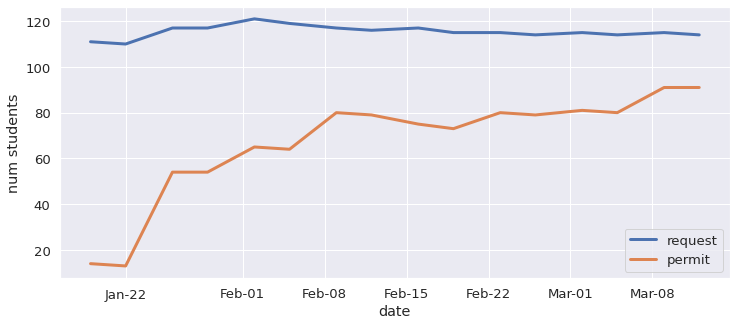

In [17]:
# solution
import matplotlib.dates as mdates

plt.plot(df_nuflex_by_date['date'], df_nuflex_by_date['request'], label='request', linewidth=3)
plt.plot(df_nuflex_by_date['date'], df_nuflex_by_date['permit'], label='permit', linewidth=3)
plt.legend()
plt.xlabel('date')
plt.ylabel('num students')

plt.gcf().set_size_inches((12, 5))

# format x tick labels using strptime/strftime format string
myFmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(myFmt)